In [1]:
#Normal Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Imports for Web Scraping
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

## Web Scraping
I am going to scrape stadium data from Wikipedia. I'm looking at the stadiums with the largest capacities on Wikipedia. I believe it is a list of about the top 530.

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_stadiums_by_capacity"
open_url = urlopen(url)
html = open_url.read()

In [4]:
soup = BeautifulSoup(html, 'html.parser')

In [5]:
#Find all the table rows
rows = soup.find_all('tr')

## Convert Scraped Data To A Clean List

In [6]:
list_rows = []

#get data values from the row
for row in rows:
    td = row.find_all('td') 
    row_text = row.get_text() # get the text, not the tags

    # prep list for putting information into the overall list
    l1 = row_text.split('\n') 
    # there are empty parts in the list, removing them
    while("" in l1): 
        l1.remove("") 
    list_rows.append(l1)

## Cleaning Data
Turning the list into a pandas dataframe, and cleaning it

In [7]:
#Turn list_rows into a dataframe
df = pd.DataFrame(list_rows)
df = df[[0,1,2,3,4,5]]
df.head(10)

,0,1,2,3,4,5
0,Stadium,Capacity,City / State,Country,Tenant(s),Main use(s)
1,Rungrado 1st of May Stadium,"114,000[1]",Pyongyang,North Korea,Korea DPR national football team*,"Association football, athletics, mass games"
2,Michigan Stadium,"110,601[2]","Ann Arbor, Michigan",United States,Michigan Wolverines football,American football
3,Beaver Stadium,"106,572[3]","State College, Pennsylvania",United States,Penn State Nittany Lions football,American football
4,Kyle Field,"102,733[4]","College Station, Texas",United States,Texas A&M Aggies football,American football
5,Neyland Stadium,"102,455[5]","Knoxville, Tennessee",United States,Tennessee Volunteers football,American football
6,Tiger Stadium,"102,321[6]","Baton Rouge, Louisiana",United States,LSU Tigers football,American football
7,Ohio Stadium,"102,082[7]","Columbus, Ohio",United States,Ohio State Buckeyes football,American football
8,Bryant–Denny Stadium,"101,821[8]","Tuscaloosa, Alabama",United States,Alabama Crimson Tide football,American football
9,Darrell K Royal–Texas Memorial Stadium,"100,119[9]","Austin, Texas",United States,Texas Longhorns football,American football


In [8]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:]  #take the data thats not the header
df.columns = new_header
df.head()

,Stadium,Capacity,City / State,Country,Tenant(s),Main use(s)
1,Rungrado 1st of May Stadium,"114,000[1]",Pyongyang,North Korea,Korea DPR national football team*,"Association football, athletics, mass games"
2,Michigan Stadium,"110,601[2]","Ann Arbor, Michigan",United States,Michigan Wolverines football,American football
3,Beaver Stadium,"106,572[3]","State College, Pennsylvania",United States,Penn State Nittany Lions football,American football
4,Kyle Field,"102,733[4]","College Station, Texas",United States,Texas A&M Aggies football,American football
5,Neyland Stadium,"102,455[5]","Knoxville, Tennessee",United States,Tennessee Volunteers football,American football


In [9]:
# get rid of the brackets after some of the values
for index, value in df['Capacity'].iteritems():
    if value.endswith(']'):
        replace_value = re.sub("[\(\[].*?[\)\]]", "", value)
        df['Capacity'][index] = replace_value
            
df.head()

,Stadium,Capacity,City / State,Country,Tenant(s),Main use(s)
1,Rungrado 1st of May Stadium,"114,000",Pyongyang,North Korea,Korea DPR national football team*,"Association football, athletics, mass games"
2,Michigan Stadium,"110,601","Ann Arbor, Michigan",United States,Michigan Wolverines football,American football
3,Beaver Stadium,"106,572","State College, Pennsylvania",United States,Penn State Nittany Lions football,American football
4,Kyle Field,"102,733","College Station, Texas",United States,Texas A&M Aggies football,American football
5,Neyland Stadium,"102,455","Knoxville, Tennessee",United States,Tennessee Volunteers football,American football


In [10]:
#Info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 1 to 537
Data columns (total 6 columns):
Stadium         537 non-null object
Capacity        537 non-null object
City / State    537 non-null object
Country         537 non-null object
Tenant(s)       537 non-null object
Main use(s)     511 non-null object
dtypes: object(6)
memory usage: 25.3+ KB


In [11]:
# Check for nulls
df.isna().sum()
#Found out that when I deleted all blanks, there were some stadiums with no tenants, so main uses got moved over.

0
Stadium          0
Capacity         0
City / State     0
Country          0
Tenant(s)        0
Main use(s)     26
dtype: int64

In [12]:
#Put the Main uses back, and set Tenants to null
for index, value in df['Main use(s)'].iteritems():
    if value==None:
        df['Main use(s)'][index] = df['Tenant(s)'][index]
        df['Tenant(s)'][index] = None

In [13]:
df.isna().sum()

0
Stadium          0
Capacity         0
City / State     0
Country          0
Tenant(s)       26
Main use(s)      0
dtype: int64

In [14]:
#Change Capacity to a Numeric Column
df['Capacity'] = df['Capacity'].str.replace(',','')
df['Capacity'] = pd.to_numeric(df['Capacity'])
df.head()

,Stadium,Capacity,City / State,Country,Tenant(s),Main use(s)
1,Rungrado 1st of May Stadium,114000.0,Pyongyang,North Korea,Korea DPR national football team*,"Association football, athletics, mass games"
2,Michigan Stadium,110601.0,"Ann Arbor, Michigan",United States,Michigan Wolverines football,American football
3,Beaver Stadium,106572.0,"State College, Pennsylvania",United States,Penn State Nittany Lions football,American football
4,Kyle Field,102733.0,"College Station, Texas",United States,Texas A&M Aggies football,American football
5,Neyland Stadium,102455.0,"Knoxville, Tennessee",United States,Tennessee Volunteers football,American football


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 1 to 537
Data columns (total 6 columns):
Stadium         537 non-null object
Capacity        537 non-null float64
City / State    537 non-null object
Country         537 non-null object
Tenant(s)       511 non-null object
Main use(s)     537 non-null object
dtypes: float64(1), object(5)
memory usage: 25.3+ KB


In [16]:
#Shows the Capacity states
df.describe()

,Capacity
count,537.000000
mean,55706.752086
std,14443.983637
min,69.870000
25%,45000.000000
50%,51898.000000
75%,62567.000000
max,114000.000000


In [17]:
#Largest stadium
df.loc[df['Capacity'].idxmax()]

0
Stadium                         Rungrado 1st of May Stadium
Capacity                                             114000
City / State                                      Pyongyang
Country                                         North Korea
Tenant(s)                 Korea DPR national football team*
Main use(s)     Association football, athletics, mass games
Name: 1, dtype: object

In [18]:
#Smallest Stadium in this list
df.loc[df['Capacity'].idxmin()]

# There actually is a mistake on the wikipedia page, dropping this record

0
Stadium                     Baku National Stadium
Capacity                                    69.87
City / State                                 Baku
Country                                Azerbaijan
Tenant(s)       Azerbaijan national football team
Main use(s)       Association football, athletics
Name: 89, dtype: object

In [19]:
index = df['Capacity'].idxmin()
df = df.drop(index)

In [20]:
#Real minimum
df.loc[df['Capacity'].idxmin()]

0
Stadium              Batakan Stadium
Capacity                       40000
City / State              Balikpapan
Country                    Indonesia
Tenant(s)         Persiba Balikpapan
Main use(s)     Association football
Name: 513, dtype: object

## Visualization and Analysis

In [21]:
sns.set(style='dark')

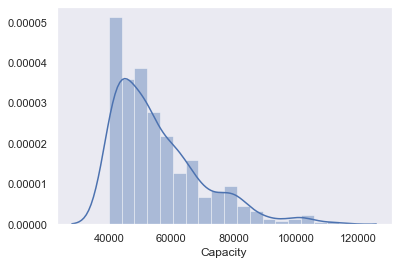

In [22]:
plt.figure()
graph = sns.distplot(df['Capacity'])
plt.show()

## Top 10 Countries
Now I want to create a graph of the top 10 countries. Which countries have the most on the list of the largest stadiums. 

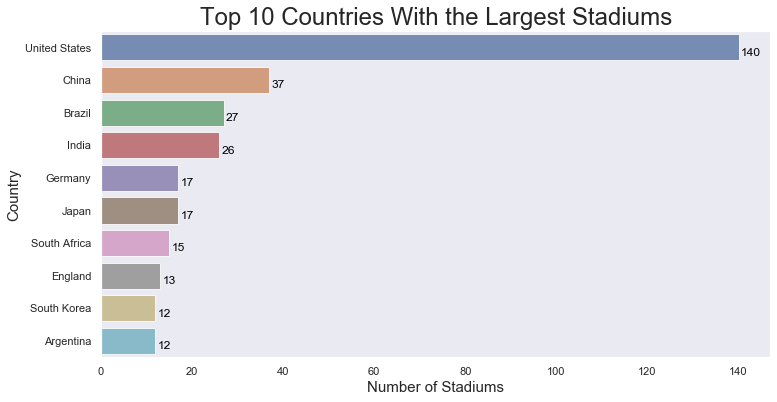

In [23]:
country_count  = df['Country'].value_counts()
top10_country = country_count[:10,]

#set graph
plt.figure(figsize=(12,6))
graph = sns.barplot(top10_country.values, top10_country.index, alpha=0.8)
plt.title('Top 10 Countries With the Largest Stadiums', fontsize=24)
plt.ylabel('Country', fontsize=15)
plt.xlabel('Number of Stadiums', fontsize=15)

#annotate graph
for i, v in enumerate(top10_country.values):
    graph.text(v + 0.5, i + 0.25, str(v), color='black', fontsize=12)
    
plt.show()

## Top 10 Sports
Now I want to make a graph of the top 10 uses. Currently in the dataset, the Main uses sometimes have multiple values in one column. This is shown in that first graph below. I want to split it first then count all the columns so I look at each sport individually. 

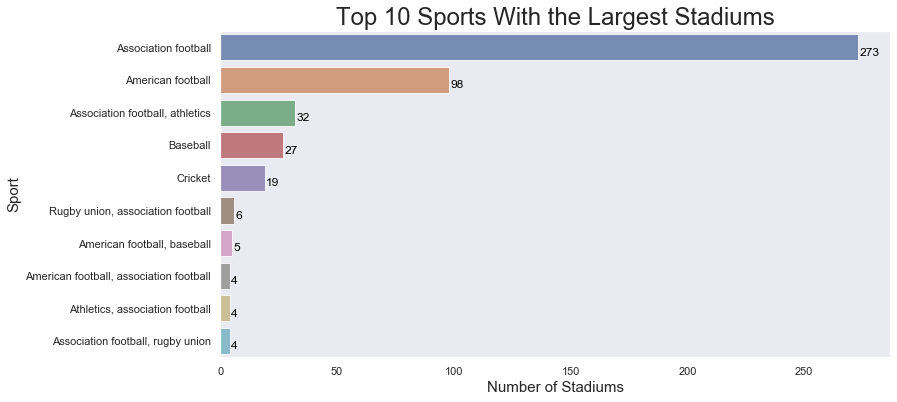

In [24]:
use_count  = df['Main use(s)'].value_counts()
top10_use = use_count[:10,]

#set graph
plt.figure(figsize=(12,6))
graph = sns.barplot(top10_use.values, top10_use.index, alpha=0.8)
plt.title('Top 10 Sports With the Largest Stadiums', fontsize=24)
plt.ylabel('Sport', fontsize=15)
plt.xlabel('Number of Stadiums', fontsize=15)

#annotate graph
for i, v in enumerate(top10_use.values):
    graph.text(v + 0.5, i + 0.25, str(v), color='black', fontsize=12)
    
#This graph will show the issue with combined lists.
plt.show()

In [25]:
#Split columns, by comma
sports = df['Main use(s)']
sports = sports.str.split(',', expand=True)

#turn it all to lowercase
for col in sports:
    sports[col] = sports[col].str.lower()

#remove whitespace at beginning of columns
for col in sports:
    sports[col] = sports[col].str.strip()
sports.head()


,0,1,2,3,4
1,association football,athletics,mass games,None,None
2,american football,None,None,None,None
3,american football,None,None,None,None
4,american football,None,None,None,None
5,american football,None,None,None,None


In [26]:
#Get overall dictionary
overall = dict(sports[0].value_counts())
print("Original:\n", overall)

#Loops through each column except original and adds values to the dictionary
for i in range(1,5):
    dict2 = dict(sports[i].value_counts()) #gets current column
    for key in dict2: 
        if key in overall: 
            overall[key] = overall[key] + dict2[key] #if key exists, add values
        else: 
            overall.update({key: dict2[key]}) #if key doesn't exist, append to dict

print("\n\nUpdated:\n", overall)         


Original:
 {'association football': 326, 'american football': 115, 'baseball': 29, 'cricket': 23, 'rugby union': 13, 'athletics': 8, 'gaelic football': 3, 'rugby league': 3, 'canadian football': 3, 'hurling': 3, 'australian rules football': 3, 'equestrian and show jumping': 1, 'none': 1, 'cricket and association football[115]': 1, 'bullfighting': 1, 'up cricket association': 1, 'basketball': 1, 'hockey': 1}


Updated:
 {'association football': 355, 'american football': 120, 'baseball': 38, 'cricket': 33, 'rugby union': 25, 'athletics': 49, 'gaelic football': 6, 'rugby league': 7, 'canadian football': 3, 'hurling': 6, 'australian rules football': 8, 'equestrian and show jumping': 1, 'none': 1, 'cricket and association football[115]': 1, 'bullfighting': 1, 'up cricket association': 1, 'basketball': 3, 'hockey': 2, 'lacrosse': 4, 'speedway': 1, 'rugby': 1, 'camogie': 1, '': 1, 'mass games': 1}


In [27]:
#Convert back to dataframe so I can graph
l1 = list(overall.keys())
l2 = list(overall.values())

df = pd.DataFrame([l1,l2])
df = df.transpose()
df.columns = ['sport','stadiums'] #rename columns
df['stadiums']=pd.to_numeric(df['stadiums']) # convert column to numeric
df.head()

,sport,stadiums
0,association football,355
1,american football,120
2,baseball,38
3,cricket,33
4,rugby union,25


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
sport       24 non-null object
stadiums    24 non-null int64
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [33]:
df = df.sort_values(by='stadiums', ascending=False)
top10_use = df[:10]
print(top10_use)

                        sport  stadiums
0        association football       355
1           american football       120
5                   athletics        49
2                    baseball        38
3                     cricket        33
4                 rugby union        25
10  australian rules football         8
7                rugby league         7
9                     hurling         6
6             gaelic football         6


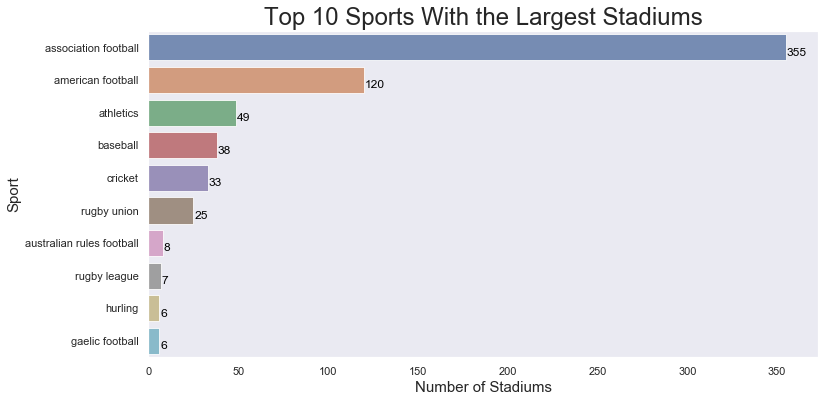

In [37]:
#set graph
plt.figure(figsize=(12,6))
graph = sns.barplot(top10_use['stadiums'], top10_use['sport'], alpha=0.8)
plt.title('Top 10 Sports With the Largest Stadiums', fontsize=24)
plt.ylabel('Sport', fontsize=15)
plt.xlabel('Number of Stadiums', fontsize=15)

#annotate graph
for i, v in enumerate(top10_use['stadiums']):
    graph.text(v + 0.5, i + 0.25, str(v), color='black', fontsize=12)
    
plt.show()